<a href="https://colab.research.google.com/github/leehgkor/lhg/blob/main/(1)_%EB%8B%A8%EC%96%B4_%EB%B9%88%EB%8F%84_%EA%B2%80%EC%83%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Step 2: 필요한 라이브러리 설치
!pip install matplotlib pandas koreanize-matplotlib chardet

# 기본 라이브러리 불러오기
import os # 파일 오픈
import re # 문자열 조작
import chardet  # 인코딩 감지
from collections import Counter # 빈도 계산
import matplotlib.pyplot as plt # 시각화
import koreanize_matplotlib  # 한글 폰트 호환
import pandas as pd # 데이터 처리 및 통계 등(엑셀st)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 55.2 MB/s eta 0:00:00


In [ ]:
# Step 3: 파일 인코딩 확인

# 텍스트 파일의 인코딩 감지 함수
def detect_file_encoding(file_path):
    with open(file_path, "rb") as f:
        raw_data = f.read()
    result = chardet.detect(raw_data)
    return result['encoding']

# 폴더 내 텍스트 파일 읽기 함수
def read_all_txt_files(folder_path):
    all_text = ""
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".txt"):  # .txt 파일만 처리
            file_path = os.path.join(folder_path, file_name)
            encoding = detect_file_encoding(file_path)  # 인코딩 감지
            print(f"파일: {file_name}, 감지된 인코딩: {encoding}")
            with open(file_path, "r", encoding=encoding) as f:
                all_text += f.read() + " "  # 파일 내용을 병합
    return all_text

# Google Drive 폴더 경로 설정
folder_path = "/content/drive/MyDrive/novel"  # 경로 수정
all_text = read_all_txt_files(folder_path)
print("텍스트 데이터 읽기 완료!")


파일: 대명영렬전.txt, 감지된 인코딩: UTF-16
파일: 무목왕졍튱녹01.txt, 감지된 인코딩: UTF-16
파일: 븍송연의3.txt, 감지된 인코딩: UTF-16
파일: 븍송연의2.txt, 감지된 인코딩: UTF-16
파일: 빙빙뎐4.txt, 감지된 인코딩: UTF-16
파일: 빙빙뎐3.txt, 감지된 인코딩: UTF-16
파일: 븍송연의1.txt, 감지된 인코딩: UTF-16
파일: 무목왕졍튱녹06.txt, 감지된 인코딩: UTF-16
파일: 무목왕졍튱녹07.txt, 감지된 인코딩: UTF-16
파일: 무목왕졍튱녹08.txt, 감지된 인코딩: UTF-16
파일: 무목왕졍튱녹02.txt, 감지된 인코딩: UTF-16
파일: 빙빙뎐1.txt, 감지된 인코딩: UTF-16
파일: 무목왕졍튱녹10.txt, 감지된 인코딩: UTF-16
파일: 무목왕졍튱녹12.txt, 감지된 인코딩: UTF-16
파일: 빙빙뎐5.txt, 감지된 인코딩: UTF-16
파일: 븍송연의5.txt, 감지된 인코딩: UTF-16
파일: 빙빙뎐2.txt, 감지된 인코딩: UTF-16
파일: 진쥬탑11.txt, 감지된 인코딩: UTF-16
파일: 진쥬탑12.txt, 감지된 인코딩: UTF-16
파일: 진쥬탑02.txt, 감지된 인코딩: UTF-16
파일: 진쥬탑01.txt, 감지된 인코딩: UTF-16
파일: 진쥬탑07.txt, 감지된 인코딩: UTF-16
파일: 진쥬탑09.txt, 감지된 인코딩: UTF-16
파일: 진쥬탑10.txt, 감지된 인코딩: UTF-16
파일: 진쥬탑05.txt, 감지된 인코딩: UTF-16
파일: 진쥬탑13.txt, 감지된 인

In [ ]:
# Step 4: 텍스트 전처리

# 텍스트 전처리 함수
def preprocess_text(text):

    # 태그(<태그>와 내부 내용 포함) 제거
    text = re.sub(r"<[^>]*>.*?</[^>]*>", " ", text, flags=re.DOTALL)  # 시작 및 닫는 태그와 내부 내용 제거
    # <note> 태그와 내부 내용 제거
    text = re.sub(r"<note>.*?</note>", " ", text, flags=re.DOTALL)
    # 특수 문자 제거
    text = re.sub(r"[^\w\s]", "", text)
    # 숫자, 로마자, 알파벳이 포함된 단어 제거
    text = re.sub(r"\b\w*[0-9IVXLCDMivxlcdmA-Za-z]\w*\b", "", text)
    # 연속된 공백 제거
    text = re.sub(r"\s+", " ", text)
    return text.strip()

# 텍스트 전처리 수행
cleaned_text = preprocess_text(all_text)
print("전처리 완료!")

# 전처리된 텍스트의 앞부분 출력
print("전처리된 텍스트 (앞부분):")
print(cleaned_text[100:500])  # 첫 500자 출력


전처리 완료!
전처리된 텍스트 (앞부분):
大明聖主賢臣開運傳 대명셩쥬현신개운뎐 통녕統領여 텬하 졔어 졔 인의와 도덕으로 니러나지 아니리 업고 음욕과 모진 일노 망치 아니리 업니 녜로브터 이졔 니히 쳔만여년이 변대 나 둘히 아니라 삼왕三王으로 나려오 큰 인군이라 일니 한고조漢高祖와 당태종唐太宗과 송태죄宋太祖니 한이 모진 진秦을 치고 텬하 어더 텬하 졍히 후의 당과 송이 그 버금의 니러고 오직 우리 태조 고황뎨高皇帝 하을 응여 사을 슌히 며 니러나 모든 영웅드 거리고 오랑 원元을 모라 내치고 비리고 더러온 풍쇽을 변며 례도의 풍뉴 빗게 혀 내오시니 큰 공업이 진실노 한과 당의 혀나 삼대三代 젹과 가지로 늉셩더라 숑운宋運이 비로소 희미므로브터 원셰죄元世祖 니러니 일홈은 홀필열忽必烈이라 원태조 원래는 이곳에 자가 있으나 잘못 들어간 듯하여 삭제함 쳘믁진鐵木


In [ ]:
# Step 5: 토크나이징 및 단어 빈도 계산

from collections import Counter

# 단어 빈도 계산 함수
def compute_word_frequencies(text):
    tokens = text.split()  # 띄어쓰기 기준 토크나이징
    return Counter(tokens)

# 단어 빈도 계산
word_counts = compute_word_frequencies(cleaned_text)

# 상위 10개 단어 출력
print("상위 20개 단어:", word_counts.most_common(20))


상위 20개 단어: [('왈', 16323), ('못', 10291), ('이', 9930), ('고', 8665), ('그', 8172), ('니', 6032), ('엇지', 5415), ('여', 5396), ('아니', 4155), ('다', 3222), ('말을', 2715), ('보고', 2646), ('부인이', 2320), ('의', 2282), ('을', 2262), ('다시', 2189), ('후', 2176), ('가', 2112), ('네', 2042), ('한', 2029)]


In [ ]:
# Step 6: 불용어 목록 생성

# 빈도 기반 불용어 생성 함수(백분율)
def generate_stopwords_from_frequency(word_counts, threshold=0.05):
    most_common_threshold = int(len(word_counts) * threshold)
    return set(word for word, _ in word_counts.most_common(most_common_threshold))

# 사용자 정의 불용어 추가
custom_stopwords = {
    "세종계획", "책임자", "연구원", "페이지", "그림이", "삽입되었음", "입력한", "것임", "있으나", "오기이므로", "바로잡음",
    "원문에", "페이지", "파일", "변환", "헤더", "붙임", "전산입력", "언해번역자료", "유지", "ꡔ후슈호뎐ꡕ",
    "마킹", "세종", "책임자", "구축", "문헌", "입력", "말뭉치", "지침에",	"따름", "텍스트는",
    "국립국어연구원", "작업", "내용", "구활자본", "고소설전집", "한국어", "고어", "學古房", "김흥규",
    "말뭉치중국소설희곡", "번역본", "총서", "직접", "연대", "박희병", "누락이므로", "첨가함", "박재연", "교주", "	중국소설희곡", "중국소설희곡"
}

# 불용어 생성 (빈도 기반 + 사용자 정의 불용어 병합)
stop_words_from_frequency = generate_stopwords_from_frequency(word_counts, threshold=0.01)
stop_words_from_frequency.update(custom_stopwords)  # 사용자 정의 불용어 추가

print("생성된 불용어:", stop_words_from_frequency)

# 불용어 제거 함수
def remove_stopwords(tokens, stop_words):
    return [word for word in tokens if word not in stop_words]

# 불용어 제거
tokens = cleaned_text.split()
tokens_without_stopwords = remove_stopwords(tokens, stop_words_from_frequency)

# 불용어 제거 후 단어 빈도 계산
filtered_word_counts = Counter(tokens_without_stopwords)

# 상위 10개 단어 출력
print("불용어 제거 후 상위 10개 단어:", filtered_word_counts.most_common(10))


생성된 불용어: {'엇더뇨', '나며', '쥬', '지난', '이리', '텬하', '우리', '발셔', '밧그로', '누어', '가부를', '안져', '지금', '손의', '대', '무른', '아니리오', '다시', '옥슈를', '두지', '권여', '부부의', '영을', '쳔만', '밋', '멀니', '신셰를', '부친이', '길의', '리', '녀로', '인젹이', '더욱', '명일', '슬', '언파의', '냐', '등의', '쇼녜', '주고', '람이', '이시나', '엇디', '등은', '업서', '귀를', '군를', '극히', '심하에', '리로다', '달나', '신이', '노', '아니요', '먼져', '슬하의', '가며', '니르지', '국가', '차시', '당야', '맛참', '츈향', '가로', '댱시', '거즛', '친이', '일신을', '강', '마라', '업거', '마이', '람을', '후에', '아냐', '무삼', '눈의', '젼', '구여', '죽을', '갓지', '신부를', '일개', '혼이', '가져', '졍고', '달', '츈', '맛지', '보더니', '하시고', '즁의', '니지', '야야의', '형', '이제', '잇게', '한이', '부어', '즉일', '죄로', '공을', '날이', '치니', '져져를', '넉이', '도라오', '샤인이', '고하고', '보게', '답되', '신긔', '도의', '잇다가', '명되', '업스니', '나오니', '낫낫치', '그대', '부모의', '되야', '우어', '슈히', '구지', '가니라', '만고', '셰샹을', '소', '하시니', '더부러', '니고', '각고', '더', '지셩으로', '좌우', '물의', '쳥야', '명을', '목슘을', '실의', '흐르', '병을', '잇나', '호시', '읍고', '곳에', '러져', '일일히', '흔', '얼골이', '됴', '드러', '두루', '멀이', '학의', '니를', '부마', '각되', '셔로', '히고', '어대', 

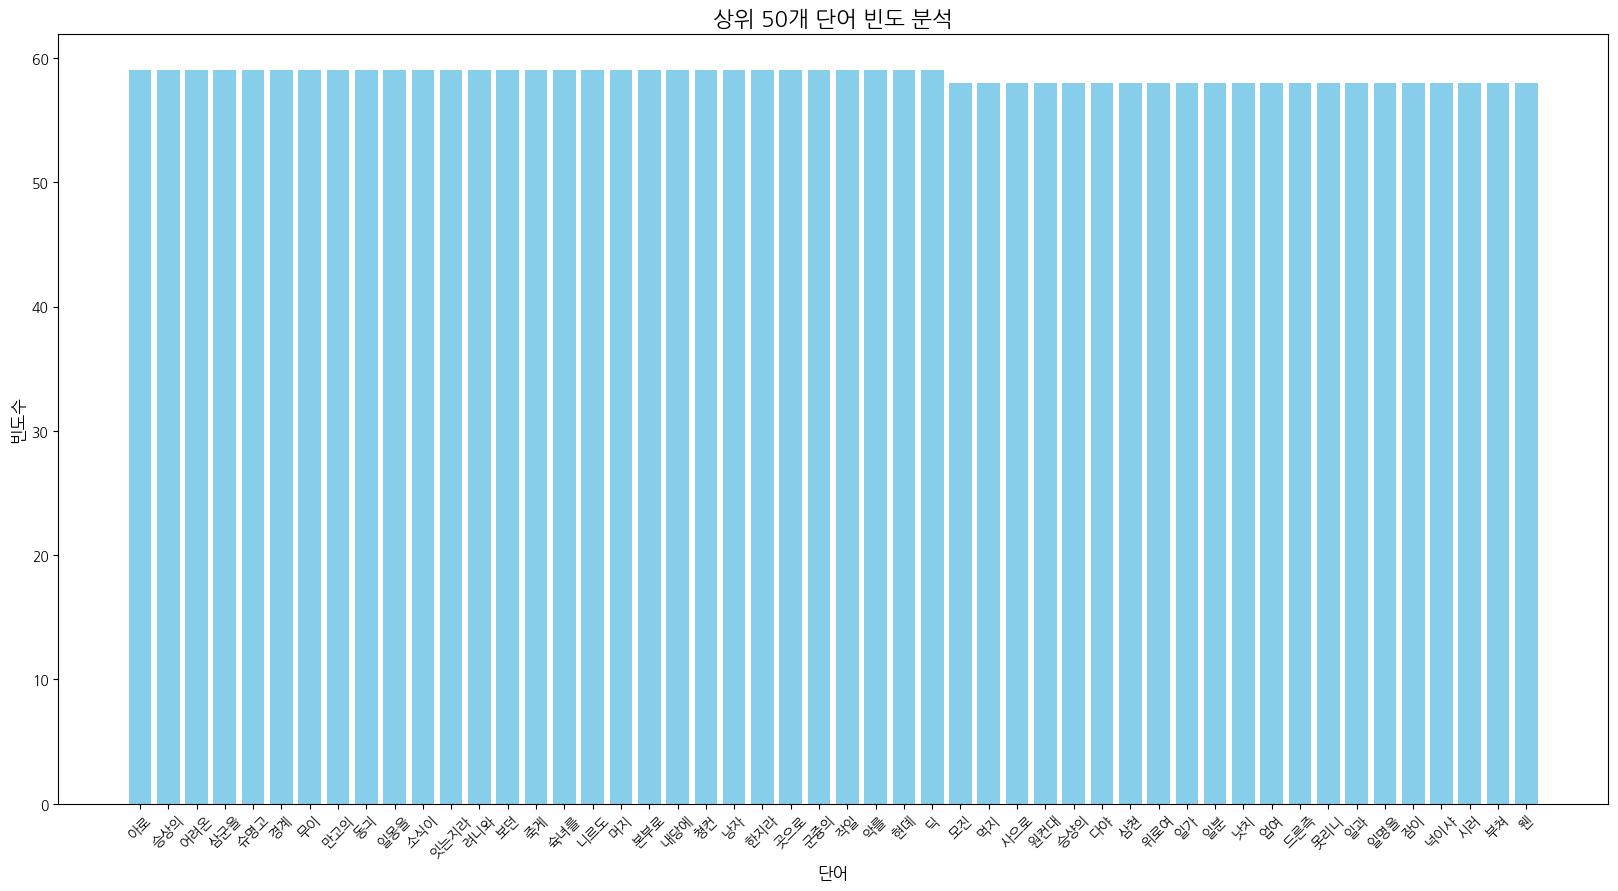

상위 50개 단어 빈도수 테이블:


,단어,빈도수
0,아로,59
1,승상의,59
2,어려온,59
3,삼군을,59
4,슈명고,59
5,경계,59
6,무이,59
7,만고의,59
8,동긔,59
9,일몽을,59


In [ ]:
# Step 7: 단어 분석 결과 산출

# 상위 N개의 단어 시각화 및 테이블 출력 함수 (세로 막대그래프)
def plot_and_display_word_frequencies(word_counts, top_n=50):
    # 상위 N개의 단어 추출
    most_common_words = filtered_word_counts.most_common(top_n)
    words, counts = zip(*most_common_words)

    # 데이터프레임 생성
    df = pd.DataFrame({'단어': words, '빈도수': counts})

    # 그래프 시각화
    plt.figure(figsize=(20, 10))  # 그래프 크기 조정
    plt.bar(df['단어'], df['빈도수'], color="skyblue")
    plt.title('상위 50개 단어 빈도 분석', fontsize=16)
    plt.xlabel('단어', fontsize=12)
    plt.ylabel('빈도수', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)  # X축 단어 회전
    plt.yticks(fontsize=10)
    plt.show()

    # 데이터프레임 출력
    print("상위 50개 단어 빈도수 테이블:")
    display(df)

# 상위 50개 단어 분석 실행
plot_and_display_word_frequencies(word_counts, top_n=50)


2-gram 분석 결과:


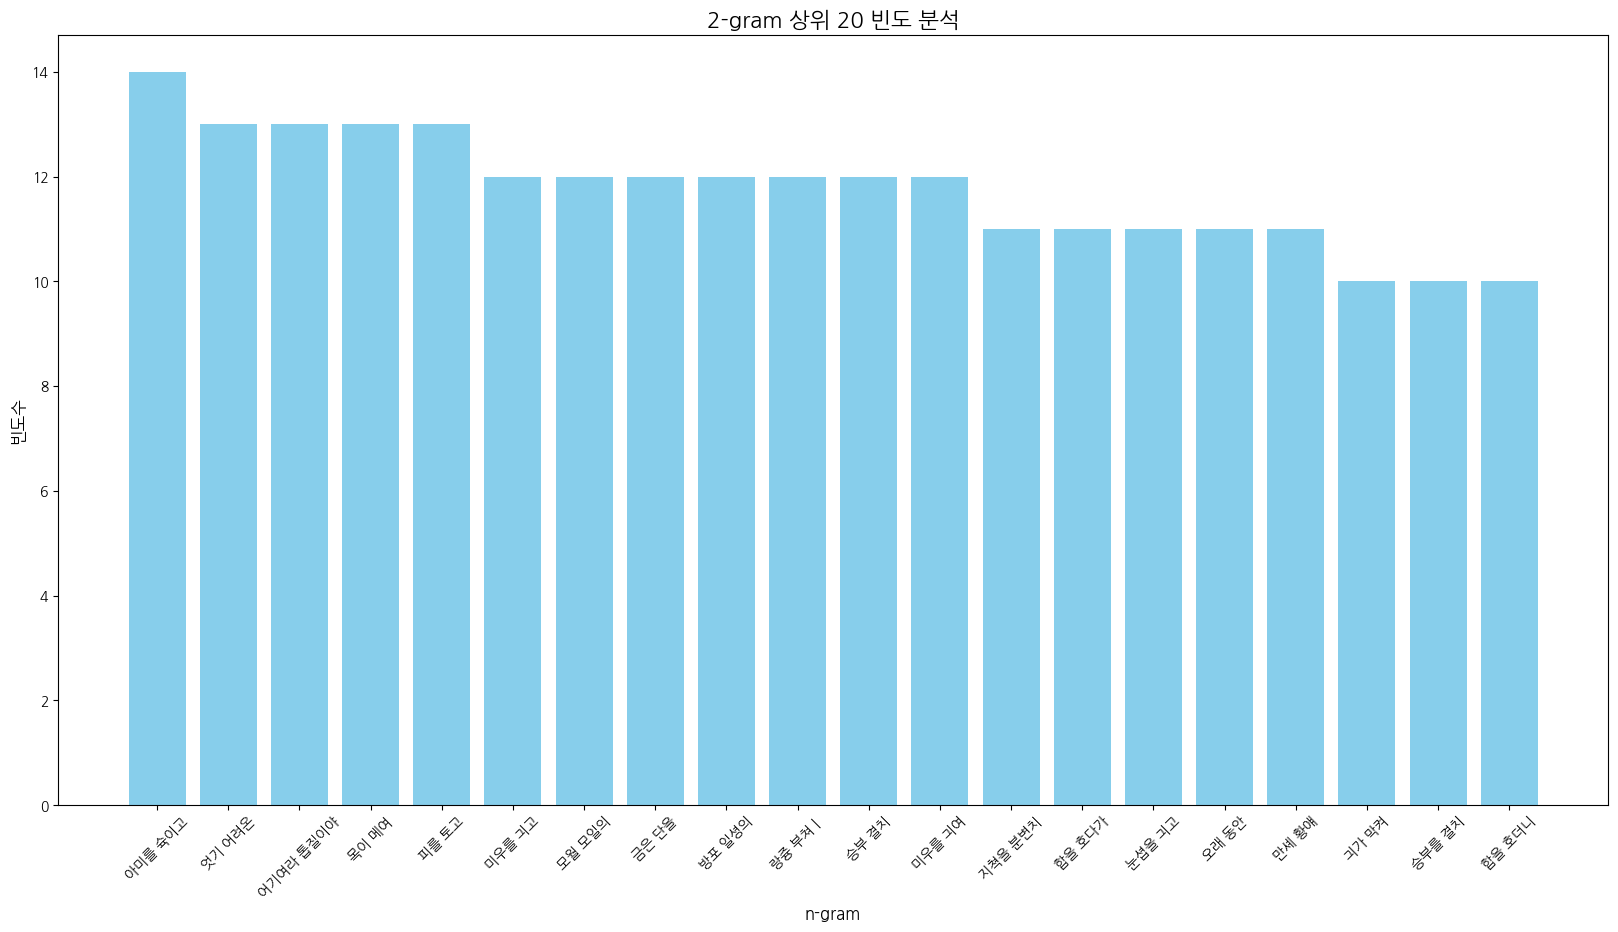

2-gram 상위 20 빈도수 테이블:


,n-gram,빈도수
0,아미를 슉이고,14
1,엇기 어려온,13
2,어기여라 톱질이야,13
3,목이 메여,13
4,피를 토고,13
5,미우를 긔고,12
6,모월 모일의,12
7,금은 단을,12
8,방포 일셩의,12
9,랑즁 부쳐ㅣ,12


In [ ]:
# Step 7: 단어 분석 결과 산출(n-gram)

# n-gram 생성 함수
def generate_ngrams(tokens, n):
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

# n-gram 빈도 계산 및 시각화 함수
def plot_and_display_ngrams(tokens, n=2, top_n=20):
    # n-gram 생성
    ngrams = generate_ngrams(tokens, n)
    ngram_counts = Counter(ngrams)

    # 상위 N개의 n-gram 추출
    most_common_ngrams = ngram_counts.most_common(top_n)
    ngram_phrases, counts = zip(*most_common_ngrams)

    # 데이터프레임 생성
    df = pd.DataFrame({'n-gram': ngram_phrases, '빈도수': counts})

    # 그래프 시각화
    plt.figure(figsize=(20, 10))
    plt.bar(df['n-gram'], df['빈도수'], color="skyblue")
    plt.title(f'{n}-gram 상위 {top_n} 빈도 분석', fontsize=16)
    plt.xlabel('n-gram', fontsize=12)
    plt.ylabel('빈도수', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

    # 데이터프레임 출력
    print(f"{n}-gram 상위 {top_n} 빈도수 테이블:")
    display(df)

# 2-gram 분석 실행
print("2-gram 분석 결과:")
plot_and_display_ngrams(tokens_without_stopwords, n=2, top_n=20)


3-gram 분석 결과:


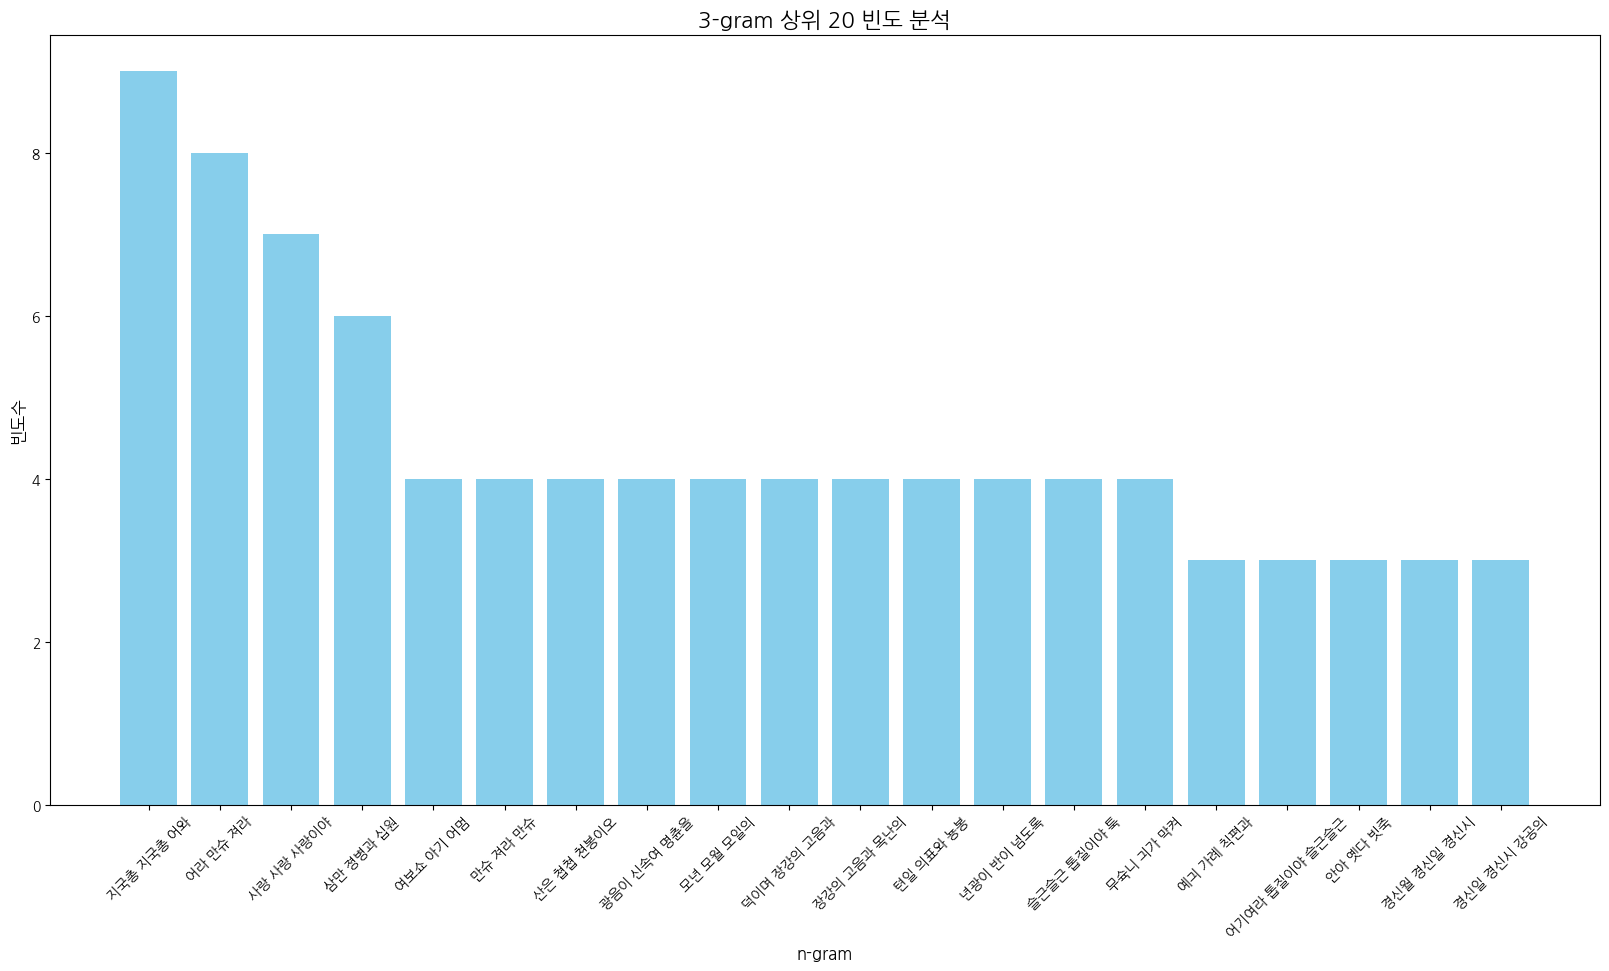

3-gram 상위 20 빈도수 테이블:


,n-gram,빈도수
0,지국총 지국총 어와,9
1,어라 만슈 져라,8
2,사랑 사랑 사랑이야,7
3,삼만 졍병과 십원,6
4,여보쇼 아기 어멈,4
5,만슈 져라 만슈,4
6,산은 쳡쳡 쳔봉이오,4
7,광음이 신속여 명츈을,4
8,모년 모월 모일의,4
9,덕이며 장강의 고음과,4


In [ ]:
# 3-gram 분석 실행
print("3-gram 분석 결과:")
plot_and_display_ngrams(tokens_without_stopwords, n=3, top_n=20)
